In [1]:
import numpy as np
import time

# 设置数组大小
array_size = 10**9

# 生成随机数据并保存到文件
data = np.random.rand(array_size)
data.tofile('data.bin')

print("start loading......")

# 不使用 memmap
start_time = time.time()
loaded_array = np.fromfile('data.bin', dtype='float64')
end_time = time.time()
print(f"不使用 memmap 加载时间: {end_time - start_time:.4f} 秒")

# 使用 memmap
start_time = time.time()
mmapped_array = np.memmap('data.bin', dtype='float64', mode='r', shape=(array_size,))
end_time = time.time()
print(f"使用 memmap 加载时间: {end_time - start_time:.4f} 秒")

# 清理
import os
os.remove('data.bin')


start loading......
不使用 memmap 加载时间: 333.2065 秒
使用 memmap 加载时间: 0.0011 秒


In [6]:
import mmap
import numpy as np
import time
import os

# 设置数组大小
array_size = 10**9

# 生成随机数据并保存到文件
data = np.random.rand(array_size).astype('float64')
data.tofile('data.bin')

print("start loading......")

# 使用 Python 的 mmap
start_time = time.time()
with open('data.bin', 'r+b') as f:
    mm = mmap.mmap(f.fileno(), 0)
    # 读取部分数据
    values = mm[:]
    end_time = time.time()
    # note that new content must have same size
    # mm[6:] = b" world!\n"
    # ... and read again using standard file methods
    
print(f"使用 mmap 加载时间: {end_time - start_time:.4f} 秒")

# 使用 NumPy 的 memmap
start_time = time.time()
mmapped_array = np.memmap('data.bin', dtype='float64', mode='r', shape=(array_size,))
end_time = time.time()
print(f"使用 memmap 加载时间: {end_time - start_time:.4f} 秒")

# 清理
# os.remove('data.bin')


start loading......
使用 mmap 加载时间: 7.1870 秒
使用 memmap 加载时间: 1.2548 秒


In [3]:
import numpy as np
import mmap
import os
import time
import torch

# 创建一个测试文件
filename = 'test_file.bin'
file_size = 10 ** 9

with open(filename, 'wb') as f:
    f.write(os.urandom(file_size))

# 使用 mmap
def mmap_read(filename):
    with open(filename, 'rb') as f:
        mm = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)
        data = mm[:]  # 读取前1024字节
        mm.close()
    return data

# 使用 numpy memmap
def memmap_read(filename):
    mm = np.memmap(filename, dtype=np.uint8, mode='r', shape=(file_size,))
    data = mm[:]  # 读取前1024字节
    del mm
    return data

# 假设的 MapAllocator 示例
def map_allocator_read(filename):
    tensor = torch.from_file(filename, dtype=torch.uint8)
    data = tensor[:]
    return data

# 测速函数
def benchmark(func, *args):
    start_time = time.time()
    data = func(*args)
    end_time = time.time()
    print(f"{func.__name__}: {end_time - start_time:.6f} seconds")
    return data

# 执行测试
print("Starting benchmark...\n")
benchmark(mmap_read, filename)
benchmark(memmap_read, filename)
benchmark(map_allocator_read, filename)

# 删除测试文件
os.remove(filename)


Starting benchmark...

mmap_read: 0.003783 seconds
memmap_read: 0.000410 seconds
map_allocator_read: 0.000186 seconds


In [4]:
import numpy as np
import mmap
import os
import time
import torch

# 创建一个测试文件
filename = 'test_file.bin'
file_size = 10 ** 9

with open(filename, 'wb') as f:
    f.write(os.urandom(file_size))

# 使用 mmap
def mmap_read(filename):
    with open(filename, 'rb') as f:
        mm = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)
        data = mm  # 读取前1024字节
        mm.close()
    return data

# 使用 numpy memmap
def memmap_read(filename):
    mm = np.memmap(filename, dtype=np.uint8, mode='r', shape=(file_size,))
    data = mm  # 读取前1024字节
    del mm
    return data

# 假设的 MapAllocator 示例
def map_allocator_read(filename):
    tensor = torch.from_file(filename, dtype=torch.uint8)
    data = tensor
    return data

# 测速函数
def benchmark(func, *args):
    start_time = time.time()
    data = func(*args)
    end_time = time.time()
    print(f"{func.__name__}: {end_time - start_time:.6f} seconds")
    return data

# 执行测试
print("Starting benchmark...\n")
benchmark(mmap_read, filename)
benchmark(memmap_read, filename)
benchmark(map_allocator_read, filename)

# 删除测试文件
os.remove(filename)


Starting benchmark...

mmap_read: 0.004214 seconds
memmap_read: 0.000288 seconds
map_allocator_read: 0.000120 seconds


In [14]:
import numpy as np
import time
import torch
import mmap

# 设置数组大小
file_size = 10**9

# 生成随机数据并保存到文件
filename = 'data.bin'
# data = np.random.rand(file_size)
# data.tofile(filename)

print("start loading......")

# 使用 mmap
def mmap_read(filename):
    with open(filename, 'rb') as f:
        mm = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)
        # data = mm[:1024]  # 读取前1024字节
        data = mm
        mm.close()
    print(data)
    return data

# 使用 numpy memmap
def memmap_read(filename):
    mm = np.memmap(filename, dtype=np.uint8, mode='w+', shape=(file_size,))
    # data = mm[:1024]  # 读取前1024字节
    data = mm
    del mm
    data += 1
    print(data.shape)
    print(data)
    return data

# 假设的 MapAllocator 示例
def map_allocator_read(filename):
    tensor = torch.from_file(filename, dtype=torch.uint8, size=file_size)
    # data = tensor[:1024]
    print(tensor.shape)
    data = tensor
    data += 1
    # print(data)
    return data

# 测速函数
def benchmark(func, *args):
    start_time = time.time()
    data = func(*args)
    end_time = time.time()
    print(f"{func.__name__}: {end_time - start_time:.6f} seconds")
    return data

# 执行测试
print("Starting benchmark...\n")
benchmark(mmap_read, filename)
benchmark(memmap_read, filename)
benchmark(map_allocator_read, filename)

# 删除测试文件
# os.remove(filename)




start loading......
Starting benchmark...

<mmap.mmap closed=True>
mmap_read: 0.000677 seconds


(1000000000,)
[1 1 1 ... 1 1 1]
memmap_read: 1.240054 seconds
torch.Size([1000000000])
map_allocator_read: 0.220634 seconds


tensor([2, 2, 2,  ..., 2, 2, 2], dtype=torch.uint8)

In [1]:
from mmengine.config import Config
from mmdet.registry import DATASETS, DATA_SAMPLERS
from torch.utils.data import DataLoader
from mmengine.registry import init_default_scope, FUNCTIONS

cfg = Config.fromfile('configs/detseg/grounding_dino_bbyy_swin-t_lf.py')
init_default_scope('mmdet')

dataset = DATASETS.build(cfg.train_dataloader.dataset)
sampler = None
batch_sampler = DATA_SAMPLERS.build(cfg.train_dataloader.batch_sampler, default_args=dict(dataset=dataset, seed=None))
collate_fn = FUNCTIONS.get('pseudo_collate')
data_loader = DataLoader(
            dataset=dataset,
            sampler=sampler if batch_sampler is None else None,
            batch_sampler=batch_sampler,
            collate_fn=collate_fn)



/home/arima/anaconda3/envs/detseg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for i, sample in enumerate(data_loader):
    if i > 20:
        break
    # print(sample['data_samples'])

{'img_path': 'data/LostAndFound/leftImg8bit/train/06_Galgenbergstr_40/06_Galgenbergstr_40_000000_000030_leftImg8bit.png', 'seg_map_path': 'data/LostAndFound/gtCoarse/train/06_Galgenbergstr_40/06_Galgenbergstr_40_000000_000030_gtCoarse_labelTrainIds.png', 'label_map': None, 'reduce_zero_label': False, 'seg_fields': [], 'video_id': '06', 'sample_idx': 424, 'text': ('road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'), 'caption_prompt': None, 'custom_entities': True, 'img_id': 424}


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'mmdet.structures.det_data_sample.DetDataSample'>

In [22]:
dataset[0]['data_samples']

<DetDataSample(

    META INFORMATION
    scale_factor: (1.6363636363636365, 1.6355555555555557)
    text: 'objects. speaker. kiwi fruit. shelf. broom. parrot. fork. telephone. clock. chair. starfish. cigar. whiteboard. carrot. carriage. crab. sheep. airplane. person. slippers. race car. swing. chicken. cello. chopsticks. board eraser. tea pot. blender. tripod. slide. carpet. corn. toaster. stroller. cymbal. refrigerator. life saver. barrel. dining table. teddy bear. eggplant. pan. bow tie. laptop. chainsaw. french fries. watch. shrimp. high heels. shampoo. baozi. cabbage. barbell. converter. binoculars. hoverboard. flower. pie. swan. canned. sneakers. paddle. llama. bottle. coffee table. trumpet. toothpaste. suitcase. papaya. penguin. helicopter. flute. truck. tomato. durian. jellyfish. '
    dataset_mode: 'OD'
    flip: True
    img_shape: (736, 954)
    img_path: 'data/objects365v1/train/obj365_train_000000367456.jpg'
    tokens_positive: 
        17: [[153, 159]]
        59: [[543,

In [3]:
num_vertices = 5

visited = [False for _ in range(num_vertices)]
num_visited = 1
res = 0

def sumdist(edges, curr_vertex, curr_len):
    global res
    res += curr_len
    for v in edges[curr_vertex]:
        if (visited[v] == False):
            visited[v] = True
            sumdist(edges, v, curr_len+1)

edges = [[0, 1], [2, 1], [2, 3], [2, 4]]

edges_adj = [[] for _ in range(num_vertices)]
for e in edges:
    edges_adj[e[0]].append(e[1])
    edges_adj[e[1]].append(e[0])

visited[2] = True
sumdist(edges_adj, 2, 0)
print(res)

5


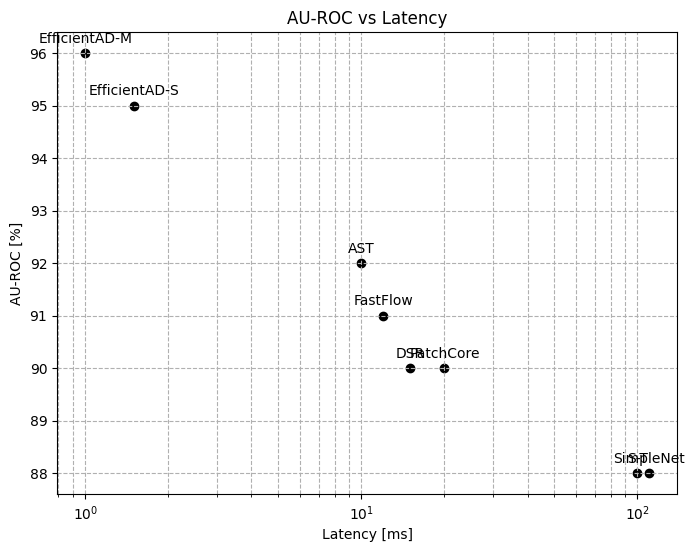

In [2]:
from matplotlib import pyplot as plt

# 示例数据
models = ['EfficientAD-M', 'EfficientAD-S', 'AST', 'PatchCore', 'DSR', 'FastFlow', 'S-T', 'SimpleNet']
auroc = [96, 95, 92, 90, 90, 91, 88, 88]  # AU-ROC 百分比
latency = [1, 1.5, 10, 20, 15, 12, 100, 110]  # Latency 延迟（毫秒，使用对数刻度）

plt.figure(figsize=(8, 6))

# 散点图
plt.scatter(latency, auroc, c='black', label='Models')

# 使用对数刻度
plt.xscale('log')

# 添加标签
for i, model in enumerate(models):
    plt.text(latency[i], auroc[i] + 0.2, model, fontsize=10, ha='center')

# 设置轴标签和标题
plt.xlabel('Latency [ms]')
plt.ylabel('AUROC [%]')
# plt.title('AU-ROC vs Latency')

# 显示图表
plt.grid(True, which="both", ls="--")
plt.show()

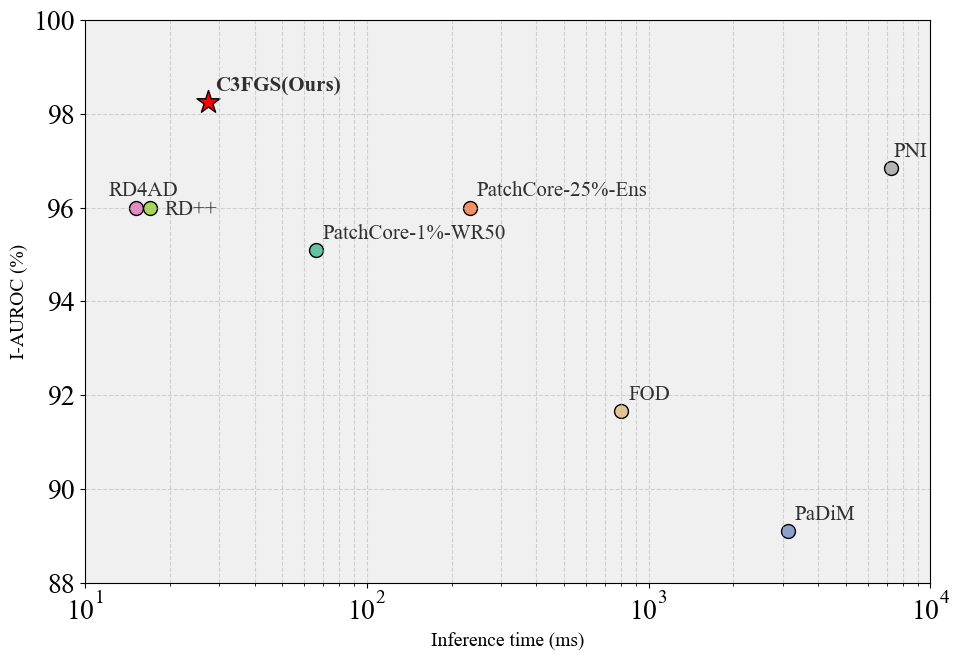

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
models = ["PatchCore-1%-WR50", "PatchCore-25%-Ens", "PaDiM", "RD++", "C3FGS(Ours)", "FOD", "PNI"]
auroc = [95.1, 96, 89.1, 95.99, 98.25, 91.66, 96.84]
latency = [65.94, 231.84, 3126.56, 17.08, 27.41, 801.06, 7265.61]

# 设置字体和样式
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 7))

# 定义颜色和标记
colors = plt.cm.Set2(np.linspace(0, 1, len(models)))
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h']

# 绘制散点图
for i, (x, y, label, color, marker) in enumerate(zip(latency, auroc, models, colors, markers)):
    if label == 'C3FGS(Ours)':
        ax.scatter(x, y, c='r', s=300, label=label, marker='*', edgecolors='black')
        ax.annotate(label, (x, y), xytext=(5, 8), textcoords='offset points', fontsize=15, alpha=0.8, fontweight='bold')
    elif label == 'PNI':
        ax.scatter(x, y, c=[color], s=100, label=label, marker='o', edgecolors='black')
        ax.annotate(label, (x, y), xytext=(2, 8), textcoords='offset points', fontsize=15, alpha=0.8)
    elif label == 'RD4AD':
        ax.scatter(x, y, c=[color], s=100, label=label, marker='o', edgecolors='black')
        ax.annotate(label, (x, y), xytext=(-20, 8), textcoords='offset points', fontsize=15, alpha=0.8)
    elif label == 'RD++':
        ax.scatter(x, y, c=[color], s=100, label=label, marker='o', edgecolors='black')
        ax.annotate(label, (x, y), xytext=(10, -5), textcoords='offset points', fontsize=15, alpha=0.8)
    else:
        ax.scatter(x, y, c=[color], s=100, label=label, marker='o', edgecolors='black')
        ax.annotate(label, (x, y), xytext=(5, 8), textcoords='offset points', fontsize=15, alpha=0.8)

# 设置对数刻度
ax.set_xscale('log')

# 设置轴标签和标题
ax.set_xlabel('Inference time (ms)', fontsize=14)
ax.set_ylabel('I-AUROC (%)', fontsize=14)
# ax.set_title('I-AUROC vs Inference Time for Different Models', fontsize=16, fontweight='bold')

# 设置y轴范围
ax.set_ylim([88, 100])
ax.set_xlim([10, 10000])

# 添加网格线
ax.grid(True, which="both", ls="--", alpha=0.5)

# 设置背景色为浅灰色
ax.set_facecolor('#f0f0f0')

# 添加图例
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()
